In [4]:
# import sklearn.datasets
import pandas as pd
import itertools
import matplotlib.pyplot as plt

# Sort function
take = lambda n, iterable: list(itertools.islice(iterable, n)) 
ascending = lambda array: dict(reversed(sorted(array.items(), key=lambda item: item[1])))

class Analyzer:
    def __init__(self, sourcePath):
        self.data = pd.read_csv(sourcePath)
        self.indexes = self.data['index']
        self.labels = self.data['label']
        self.texts = self.data['text']
        # self.processData()
        # self.sortData()
        # self.checkCounting()
        
    def processData(self):
        # Label 0
        self.words = {}
        # Label 0,1
        for i in range(3):
            # 1,2,3 - Grams
            self.words[i] = {}
            
            for j in range(3):
                self.words[i][j] = {}

        self.label0gram1Words, self.label0gram2Words, self.label0gram3Words = {}, {}, {}
        # Label 1
        self.label1gram1Words, self.label1gram2Words, self.label1gram3Words = {}, {}, {}
        # Whole
        self.gram1Words, self.gram2Words, self.gram3Words = {}, {}, {}

        # for i, text in self.data
        
        # print(self.texts)
        for i,text in enumerate(self.texts):
            # if i > 5:
            #     break
            # print(i,text)
            prev, prevPrev, current = "", "", ""
            for j, word in enumerate(text.split(" ")):
                prevPrev = prev
                prev = current
                current = word
                
                # print(word)

                # Always save to the together 
                # 1-Gram
                # print()
                # print('act1',current)
                if current not in self.words[self.labels[i]][0]:
                    self.words[self.labels[i] ][0][current] = 1
                else:
                    self.words[self.labels[i] ][0][current] = self.words[self.labels[i] ][0].get(current) + 1

                if current not in self.words[2][0]:
                    self.words[2][0][current] = 1
                else:
                    self.words[2][0][current] = self.words[2][0].get(current) + 1

                # 2-Gram
                if j > 0:
                    act2 = prev + ' ' + current
                    # print('act2', act2)
                    if act2 not in self.words[self.labels[i]][1]:
                        self.words[self.labels[i] ][1][act2] = 1
                    else:
                        self.words[self.labels[i] ][1][act2] = self.words[self.labels[i] ][1].get(act2) + 1


                    if act2 not in self.words[2][1]:
                        self.words[2][1][act2] = 1
                    else:
                        self.words[2][1][act2] = self.words[2][1].get(act2) + 1

                # 2-Gram
                if j > 1:
                    act3 = prevPrev + ' ' + prev + ' ' + current
                    # print('act3', act3)
                    if act3 not in self.words[self.labels[i]][2]:
                        self.words[self.labels[i] ][2][act3] = 1
                    else:
                        self.words[self.labels[i] ][2][act3] = self.words[self.labels[i] ][2].get(act3) + 1
                    
                    
                    if act3 not in self.words[2][2]:
                        self.words[2][2][act3] = 1
                    else:
                        self.words[2][2][act3] = self.words[2][2].get(act3) + 1
        print("process finished")
        # print(self.words[0][1])

    def sortData(self):
        self.sortedAscending = {}
        # Label 0,1
        for i in range(3):
            # 1,2,3 - Grams

            self.sortedAscending[i] = {}
            for j in range(3):
                # Sort all the words
                self.sortedAscending[i][j] = ascending( self.words[i][j] )
        print("data sorted")

    # Check the correctness by the first element's number
    # in each subset (labeled with 1 and 0) and the whole.
    def checkCounting(self):
        # Check the first X item
        checkedItems = 5
        passed = True

        for i in range(checkedItems):
            if not passed:
                break

            # Grams
            for j in range(3):
                # Get the most frequent word of all in J - Gram
                word = list(self.sortedAscending[2][j].items())[i][0]

                # Counters
                total = list(self.sortedAscending[2][j].items())[i][1]
                label1 = self.sortedAscending[0][j].get(word)
                label2 = self.sortedAscending[1][j].get(word)
                if label1 + label2 != total:
                    print('Checker failed: with the word ' + word)
                    print(label1 + label2, '!=', total, ' difference:', abs( total - label1 - label2))
                    print('The whole counter is not equal to the addition of label 0 and 1\'s counter.')
                    passed = False
                    break
                    
        if passed:
            print('Checking passed!')

    def lengthColleration(self):
        # Is there a collaration between the avarage length and label?
        lengths = { 0: {}, 1: {} }
        summ = [0,0]
        count = [0,0]
        for i, text in self.texts.items():
            # Simple avarage length
            la = self.labels[i]
            summ[la] += len(text)
            count[la] += 1
            # Number of texts by length
            if len(text) in lengths[la]:
                lengths[la][len(text)] += 1
            else:
                lengths[la][len(text)] = 1
        plt.plot( lengths[1].keys(), lengths[1].values(), 'ro', markersize=2)
        plt.plot( lengths[0].keys(), lengths[0].values(), 'bo', markersize=2)
        plt.xlabel('length of reviews')
        plt.ylabel('number of reviews')
        print('Label 0 - sum', summ[0], 'count', count[0], 'so the avarage:', (summ[0]/count[0]) )
        print('Label 1 - sum', summ[1], 'count', count[1], 'so the avarage:', (summ[1]/count[1]) )
        print()
        print('Label 1 - red; Label 0 - blue')
        plt.show()

    def printFrequent(self,n):
        # The first 5 most frequent elements
        for i in range(2):
            for j in range(3):
                print('L-' + str(i) + ' G-' + str(j+1) + ' (in ascending order): ', take(n, train.sortedAscending[i][j].items()))
            print()

        # Together the labels
        for i in range(3):
            print('Counting the whole G-' + str(i+1), take(n, train.sortedAscending[2][i].items()))

In [5]:
train = Analyzer("stsa.binary.phrases.train")
train.processData()
train.sortData()
train.checkCounting()

process finished
data sorted
Checking passed!


Label 0 - sum 1872665 count 34702 so the avarage: 53.96418073886231
Label 1 - sum 2143447 count 42259 so the avarage: 50.72166875695118

Label 1 - red; Label 0 - blue


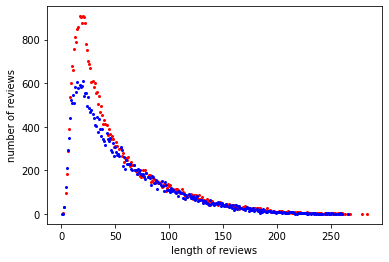

In [6]:
train.lengthColleration()

In [7]:
train.printFrequent(5)

L-0 G-1 (in ascending order):  [('the', 14357), (',', 12716), ('a', 10715), ('of', 8955), ('and', 8783)]
L-0 G-2 (in ascending order):  [('of the', 1564), (', and', 1070), ('in the', 946), ("it 's", 931), (', but', 818)]
L-0 G-3 (in ascending order):  [("the film 's", 199), ('the movie is', 125), ("it 's a", 124), (", it 's", 114), ('one of the', 113)]

L-1 G-1 (in ascending order):  [('the', 16665), (',', 16380), ('a', 13727), ('and', 13154), ('of', 11423)]
L-1 G-2 (in ascending order):  [('of the', 2232), (', and', 1565), ('in the', 1052), ("it 's", 981), ('is a', 967)]
L-1 G-3 (in ascending order):  [('one of the', 361), ("it 's a", 180), (', but it', 168), ("the film 's", 154), (', and the', 139)]

Counting the whole G-1 [('the', 31022), (',', 29096), ('a', 24442), ('and', 21937), ('of', 20378)]
Counting the whole G-2 [('of the', 3796), (', and', 2635), ('in the', 1998), ("it 's", 1912), (', but', 1744)]
Counting the whole G-3 [('one of the', 474), ("the film 's", 353), ("it 's a",